In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X = df.drop('sales', axis=1)
y = df.sales

In [8]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [19]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

In [20]:
poly_features = polynomial_converter.fit_transform(X)

In [21]:
poly_features.shape

(200, 55)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)

StandardScaler()

In [32]:
X_train = scaler.transform(X_train)

In [33]:
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [37]:
X_test = scaler.transform(X_test)

In [38]:
X_test

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [39]:
X_train.shape

(140, 55)

In [40]:
X_test.shape

(60, 55)

In [41]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lm.predict(X_test)

In [48]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [49]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681644463
MAE 		: 0.665959430758744
MSE 		: 6.634847380747123
RMSE 		: 2.575819749273447


In [50]:
y_train_pred = lm.predict(X_train)

In [51]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9976072485267145
MAE 		: 0.18621293136504619
MSE 		: 0.06296801889161865
RMSE 		: 0.25093429198022865


In [52]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,0.250934,2.575820
mae,0.186213,0.665959
mse,0.062968,6.634847
R2,0.997607,0.764990


In [54]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [56]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002845,0.002231,-0.280734,-1.994430,-31.328119,-5.597153
2,0.001916,0.002129,0.993019,-0.377066,-0.250648,-0.500647
3,0.002051,0.002006,0.983934,-0.392312,-0.306241,-0.553391
4,0.001809,0.001470,0.825272,-0.979767,-4.402358,-2.098180
5,0.001736,0.001417,0.991181,-0.322253,-0.166869,-0.408496
6,0.003336,0.001585,0.969012,-0.484493,-0.976815,-0.988339
7,0.001594,0.001702,0.992885,-0.327955,-0.144808,-0.380536
8,0.001874,0.002385,0.990130,-0.447015,-0.332058,-0.576244
9,0.001694,0.001434,0.965508,-0.465024,-0.528863,-0.727230
10,0.002334,0.001368,0.990123,-0.324433,-0.197801,-0.444748


In [58]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

In [59]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681644463
MAE 		: 0.665959430758744
MSE 		: 6.634847380747123
RMSE 		: 2.575819749273447


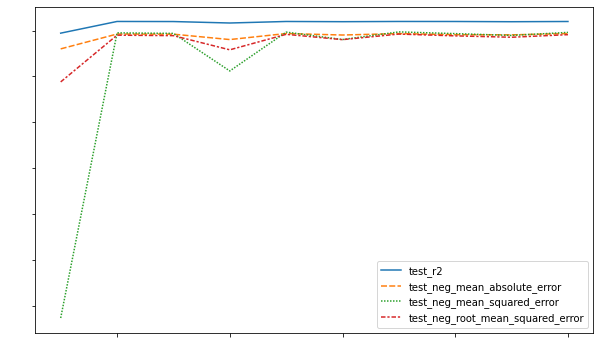

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = scores.iloc[:,2:]);

In [62]:
lm.coef_ # y = mx + c

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [63]:
lm.intercept_

14.311428571428602

In [64]:
lm_df = pd.DataFrame(lm.coef_, columns= ["lm_coef"])

In [65]:
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Ridge Regression

In [67]:
ridge_model = Ridge(alpha=1)

In [68]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [69]:
y_pred = ridge_model.predict(X_test)

In [70]:
y_pred

array([14.20362557, 19.19609837, 12.24568141, 17.14919746,  8.2365966 ,
        7.40193565, 20.01639353, 17.24719812, 10.42500679, 19.85374781,
        9.43261836, 13.89186024, 12.06463976, 23.42954238, 19.24867856,
        9.43433486, 12.38789011,  9.1508793 ,  8.6126582 , 21.39009356,
        7.52542106, 19.31824769, 27.04994335, 24.38153589,  9.05461384,
       11.68768458, 20.62848894,  9.32546658, 12.54598026,  8.32401886,
        8.91439336, 19.92949286, 10.77613464,  7.37019289, 18.0956431 ,
        9.31857766, 10.31561347,  9.55692928,  7.55673191, 10.90329356,
       12.51163614, 10.47119195, 11.18422383,  7.95740624, 11.51135481,
       10.40501783,  6.56385417, 15.4145157 , 13.12064572, 22.76264967,
       10.53415095, 13.06932923, 14.64647104, 11.74881066, 11.5972105 ,
        6.21845598, 24.90386375,  9.46952704, 17.42371545, 15.51705971])

In [71]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9825113234815026
MAE 		: 0.48244626387335215
MSE 		: 0.4937431816699826
RMSE 		: 0.7026686144050996


In [73]:
y_train_pred = ridge_model.predict(X_train)

In [74]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.988677315950169
MAE 		: 0.33814926534102036
MSE 		: 0.2979695096267567
RMSE 		: 0.5458658348227673


In [75]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,0.545866,0.702669
mae,0.338149,0.482446
mse,0.297970,0.493743
R2,0.988677,0.982511


In [76]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,0.250934,2.575820,0.545866,0.702669
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
R2,0.997607,0.764990,0.988677,0.982511


## Ridge Regression CV with alpha=1

In [77]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [78]:
scores

{'fit_time': array([0.00190592, 0.00188088, 0.0011301 , 0.00122714, 0.00129104,
        0.00174093, 0.00127983, 0.00126505, 0.00166512, 0.00107813]),
 'score_time': array([0.00164199, 0.00153708, 0.00124884, 0.00145388, 0.00184703,
        0.00155091, 0.00144076, 0.00138378, 0.00193095, 0.00116205]),
 'test_r2': array([0.98919387, 0.98829427, 0.98039907, 0.9658537 , 0.99144978,
        0.91975333, 0.99301116, 0.99030046, 0.97582771, 0.99164186]),
 'test_neg_mean_absolute_error': array([-0.43031178, -0.39946738, -0.41936987, -0.65677924, -0.34324028,
        -0.72358319, -0.29059586, -0.43447112, -0.44300946, -0.26948842]),
 'test_neg_mean_squared_error': array([-0.26432953, -0.4202811 , -0.37362665, -0.86033356, -0.16178452,
        -2.52954283, -0.14223743, -0.32631669, -0.37063647, -0.16739188]),
 'test_neg_root_mean_squared_error': array([-0.51412987, -0.6482909 , -0.61125007, -0.92754167, -0.40222446,
        -1.59045365, -0.37714378, -0.57124136, -0.6087992 , -0.40913552])}

In [80]:
scores = pd.DataFrame(scores, index=range(1, 11))

In [81]:
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001906,0.001642,0.989194,-0.430312,-0.264330,-0.514130
2,0.001881,0.001537,0.988294,-0.399467,-0.420281,-0.648291
3,0.001130,0.001249,0.980399,-0.419370,-0.373627,-0.611250
4,0.001227,0.001454,0.965854,-0.656779,-0.860334,-0.927542
5,0.001291,0.001847,0.991450,-0.343240,-0.161785,-0.402224
6,0.001741,0.001551,0.919753,-0.723583,-2.529543,-1.590454
7,0.001280,0.001441,0.993011,-0.290596,-0.142237,-0.377144
8,0.001265,0.001384,0.990300,-0.434471,-0.326317,-0.571241
9,0.001665,0.001931,0.975828,-0.443009,-0.370636,-0.608799
10,0.001078,0.001162,0.991642,-0.269488,-0.167392,-0.409136


<AxesSubplot:>

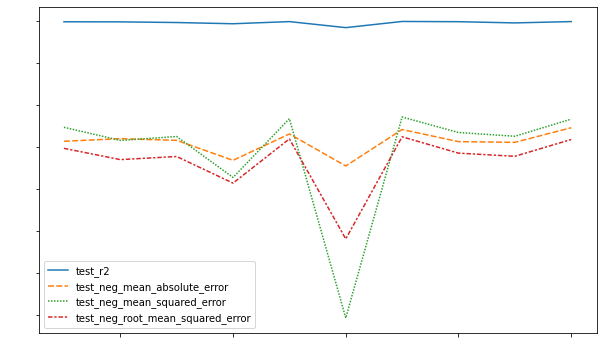

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=scores.iloc[:, 2:])

In [86]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             0.978573
test_neg_mean_absolute_error       -0.441032
test_neg_mean_squared_error        -0.561648
test_neg_root_mean_squared_error   -0.666021
dtype: float64

In [89]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163203e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [90]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [91]:
rm_df

,ridge_coef_1
0,3.428822
1,0.689086
2,0.170305
3,-0.910850
4,2.723077
5,0.112909
6,-0.404686
7,0.287950
8,-0.091937
9,-1.014535


In [92]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


In [94]:
alpha_space = np.linspace(0.01, 1, 100)

In [95]:
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [96]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv=10, scoring='neg_root_mean_squared_error')

In [97]:
ridge_cv_model

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [98]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [99]:
ridge_cv_model.alpha_

0.02

In [100]:
y_pred = ridge_cv_model.predict(X_test)

In [101]:
y_pred

array([14.9742126 , 19.32085239, 12.426077  , 17.54726044,  8.03268512,
        7.09453572, 20.22213099, 17.23342327, 10.4142269 , 19.62692652,
        9.53230224, 13.88860225, 11.85403692, 23.10108577, 19.04726953,
        9.68950153, 12.31404568,  9.33716283,  8.80211507, 21.17413204,
        7.21443767, 19.1014691 , 27.00194128, 24.27558385,  9.31901747,
       11.4433152 , 20.97696126,  9.58861951, 12.50215178,  8.21620983,
        8.83040737, 19.66535644, 10.85347988,  7.07402226, 17.8575584 ,
        9.44824495, 10.61686873,  9.80887855,  6.92384946, 10.81989151,
        9.76671342, 10.39207099, 11.43388419,  7.73822156, 12.01048272,
       10.84290535,  5.45949514, 15.33616842, 13.08304574, 22.37311871,
       10.7264909 , 12.88015523, 14.69521862, 12.06500513, 11.33901803,
        5.30328889, 24.94143058,  9.47712847, 17.573234  , 15.42647813])

In [102]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9836426476759493
MAE 		: 0.4420870233388791
MSE 		: 0.4618034516008945
RMSE 		: 0.6795612199065618


In [103]:
y_train_pred = ridge_cv_model.predict(X_train)

In [104]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9944909602193394
MAE 		: 0.2448420156515109
MSE 		: 0.14497674533117905
RMSE 		: 0.38075811919272196


In [105]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,0.380758,0.679561
mae,0.244842,0.442087
mse,0.144977,0.461803
R2,0.994491,0.983643


In [106]:
pd.concat([ls, rs, rcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643


In [107]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445636e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460875e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199234e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [108]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["Ridge_cv_coef_0.02"])

In [109]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


# Lasso

In [111]:
lasso_model = Lasso(alpha=1)

In [112]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [113]:
y_pred = lasso_model.predict(X_test)

In [114]:
y_train_pred = lasso_model.predict(X_train)

In [115]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157192
MAE 		: 1.0179586607877582
MSE 		: 2.2983900578631635
RMSE 		: 1.516044213690077


In [116]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9196504538550652
MAE 		: 1.0183549117463369
MSE 		: 2.1144911187286928
RMSE 		: 1.4541289897146996


In [117]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,1.454129,1.516044
mae,1.018355,1.017959
mse,2.114491,2.298390
R2,0.919650,0.918590


In [118]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590


In [119]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [120]:
scores

{'fit_time': array([0.00173426, 0.00154805, 0.0011189 , 0.00111103, 0.00138903,
        0.00094509, 0.00102091, 0.00282216, 0.00313997, 0.00182819]),
 'score_time': array([0.00134468, 0.00121999, 0.00133705, 0.00115991, 0.00145912,
        0.00146794, 0.00173712, 0.0026958 , 0.00191498, 0.00182509]),
 'test_r2': array([0.95594658, 0.90358295, 0.96838247, 0.93841318, 0.94381742,
        0.82965761, 0.95527855, 0.85745052, 0.92025707, 0.88713766]),
 'test_neg_mean_absolute_error': array([-0.8880444 , -1.37217137, -0.56518452, -0.81363544, -0.84703533,
        -1.30458408, -0.68903429, -1.79080891, -0.90148509, -1.21871245]),
 'test_neg_mean_squared_error': array([-1.07759395, -3.46174609, -0.60268338, -1.55171139, -1.06306901,
        -5.36954851, -0.91017499, -4.79572083, -1.22270737, -2.26033907]),
 'test_neg_root_mean_squared_error': array([-1.03807223, -1.86057682, -0.77632685, -1.24567708, -1.03105238,
        -2.31722863, -0.95403092, -2.18991343, -1.10576099, -1.50344241])}

In [121]:
scores = pd.DataFrame(scores, index=range(1,11))

In [122]:
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001734,0.001345,0.955947,-0.888044,-1.077594,-1.038072
2,0.001548,0.001220,0.903583,-1.372171,-3.461746,-1.860577
3,0.001119,0.001337,0.968382,-0.565185,-0.602683,-0.776327
4,0.001111,0.001160,0.938413,-0.813635,-1.551711,-1.245677
5,0.001389,0.001459,0.943817,-0.847035,-1.063069,-1.031052
6,0.000945,0.001468,0.829658,-1.304584,-5.369549,-2.317229
7,0.001021,0.001737,0.955279,-0.689034,-0.910175,-0.954031
8,0.002822,0.002696,0.857451,-1.790809,-4.795721,-2.189913
9,0.003140,0.001915,0.920257,-0.901485,-1.222707,-1.105761
10,0.001828,0.001825,0.887138,-1.218712,-2.260339,-1.503442


In [123]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.915992
test_neg_mean_absolute_error       -1.039070
test_neg_mean_squared_error        -2.231529
test_neg_root_mean_squared_error   -1.402208
dtype: float64

In [124]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157192
MAE 		: 1.0179586607877582
MSE 		: 2.2983900578631635
RMSE 		: 1.516044213690077


In [125]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [126]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [127]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


In [128]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [129]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [130]:
lasso_cv_model.alpha_

0.01

In [132]:
y_pred = lasso_cv_model.predict(X_test)

In [133]:
y_train_pred = lasso_cv_model.predict(X_train)

In [134]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9862951034658218
MAE 		: 0.4409752004680377
MSE 		: 0.3869188850331817
RMSE 		: 0.6220280419990579


In [136]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9888244250353099
MAE 		: 0.33906533633271657
MSE 		: 0.2940981641252693
RMSE 		: 0.5423081818719586


In [137]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,0.542308,0.622028
mae,0.339065,0.440975
mse,0.294098,0.386919
R2,0.988824,0.986295


In [138]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295


In [139]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [140]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [141]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


# Elastic Net

In [142]:
# Is a combination of Ridge & Lasso

In [144]:
elastic_model = ElasticNet()

In [145]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [146]:
y_pred = elastic_model.predict(X_test)

In [147]:
y_train_pred = elastic_model.predict(X_train)

In [148]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9020164827239767
MAE 		: 1.2006537964645356
MSE 		: 2.7662867181464637
RMSE 		: 1.663215776183735


In [150]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.896125980369787
MAE 		: 1.2484802032843603
MSE 		: 2.7335648116611186
RMSE 		: 1.6533495733392616


In [151]:
elastic_model.l1_ratio

0.5

In [152]:
elastic_model.alpha

1.0

In [153]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.653350,1.663216
mae,1.248480,1.200654
mse,2.733565,2.766287
R2,0.896126,0.902016


In [154]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016


In [155]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [156]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [157]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


In [158]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [159]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [160]:
elastic_cv_model.alpha_

0.01

In [161]:
elastic_cv_model.l1_ratio_

1.0

In [162]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [163]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [164]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000,-0.000000


In [165]:
y_pred = elastic_cv_model.predict(X_test)

In [166]:
y_train_pred = elastic_cv_model.predict(X_train)

In [167]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9862951034658218
MAE 		: 0.4409752004680377
MSE 		: 0.3869188850331817
RMSE 		: 0.6220280419990579


In [168]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9888244250353099
MAE 		: 0.33906533633271657
MSE 		: 0.2940981641252693
RMSE 		: 0.5423081818719586


In [169]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,0.542308,0.622028
mae,0.339065,0.440975
mse,0.294098,0.386919
R2,0.988824,0.986295


In [170]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295


# GridSearchCV

In [172]:
elastic_model = ElasticNet(tol=0.01, max_iter=10000)

In [173]:
param_grid ={"alpha":[0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [174]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [175]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, tol=0.01),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [176]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [178]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001702,0.000411,0.000403,0.000110,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.616727,-0.720457,-0.585934,-0.677711,-0.466305,-1.785941,-0.386594,-0.568616,-0.604771,-0.464067,-0.687712,0.378609,11
1,0.001723,0.000320,0.000539,0.000163,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.678853,-0.780662,-0.569113,-0.574002,-0.476698,-1.770841,-0.411215,-0.535465,-0.592014,-0.534330,-0.692319,0.372225,12
2,0.001500,0.000691,0.000423,0.000120,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.678060,-0.749517,-0.551032,-0.550841,-0.461558,-1.759485,-0.410093,-0.518222,-0.588959,-0.518496,-0.678626,0.372093,9
3,0.001229,0.000173,0.000329,0.000057,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.671731,-0.725301,-0.538630,-0.542335,-0.452623,-1.742214,-0.403505,-0.505980,-0.595931,-0.502694,-0.668095,0.369442,4
4,0.001085,0.000122,0.000289,0.000026,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.671527,-0.719870,-0.528741,-0.540120,-0.449354,-1.739713,-0.403035,-0.501764,-0.595147,-0.495727,-0.664500,0.369801,3
5,0.001075,0.000148,0.000290,0.000046,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.669691,-0.711933,-0.525804,-0.536906,-0.444850,-1.737410,-0.402206,-0.499164,-0.593874,-0.494558,-0.661640,0.369743,2
6,0.000977,0.000081,0.000275,0.000017,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.669684,-0.710920,-0.521646,-0.536156,-0.444455,-1.736887,-0.402035,-0.497376,-0.594810,-0.494406,-0.660837,0.369860,1
7,0.001724,0.000488,0.000403,0.000147,0.02,0.1,"{'alpha': 0.02, 'l1_ratio': 0.1}",-0.653623,-0.775079,-0.566694,-0.645186,-0.437245,-1.806226,-0.397164,-0.661691,-0.566938,-0.547486,-0.705733,0.381465,14
8,0.001208,0.000207,0.000350,0.000083,0.02,0.5,"{'alpha': 0.02, 'l1_ratio': 0.5}",-0.700349,-0.769470,-0.531243,-0.584599,-0.437581,-1.780799,-0.421723,-0.593093,-0.573877,-0.563137,-0.695587,0.375090,13
9,0.001393,0.000295,0.000359,0.000109,0.02,0.7,"{'alpha': 0.02, 'l1_ratio': 0.7}",-0.691412,-0.734408,-0.497825,-0.577165,-0.425011,-1.785290,-0.425517,-0.584410,-0.588482,-0.552947,-0.686247,0.378360,10


In [179]:
y_pred = grid_model.predict(X_test)

In [180]:
y_train_pred = grid_model.predict(X_train)

In [181]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9800943393901784
MAE 		: 0.5365382817422943
MSE 		: 0.5619798726530832
RMSE 		: 0.7496531682405426


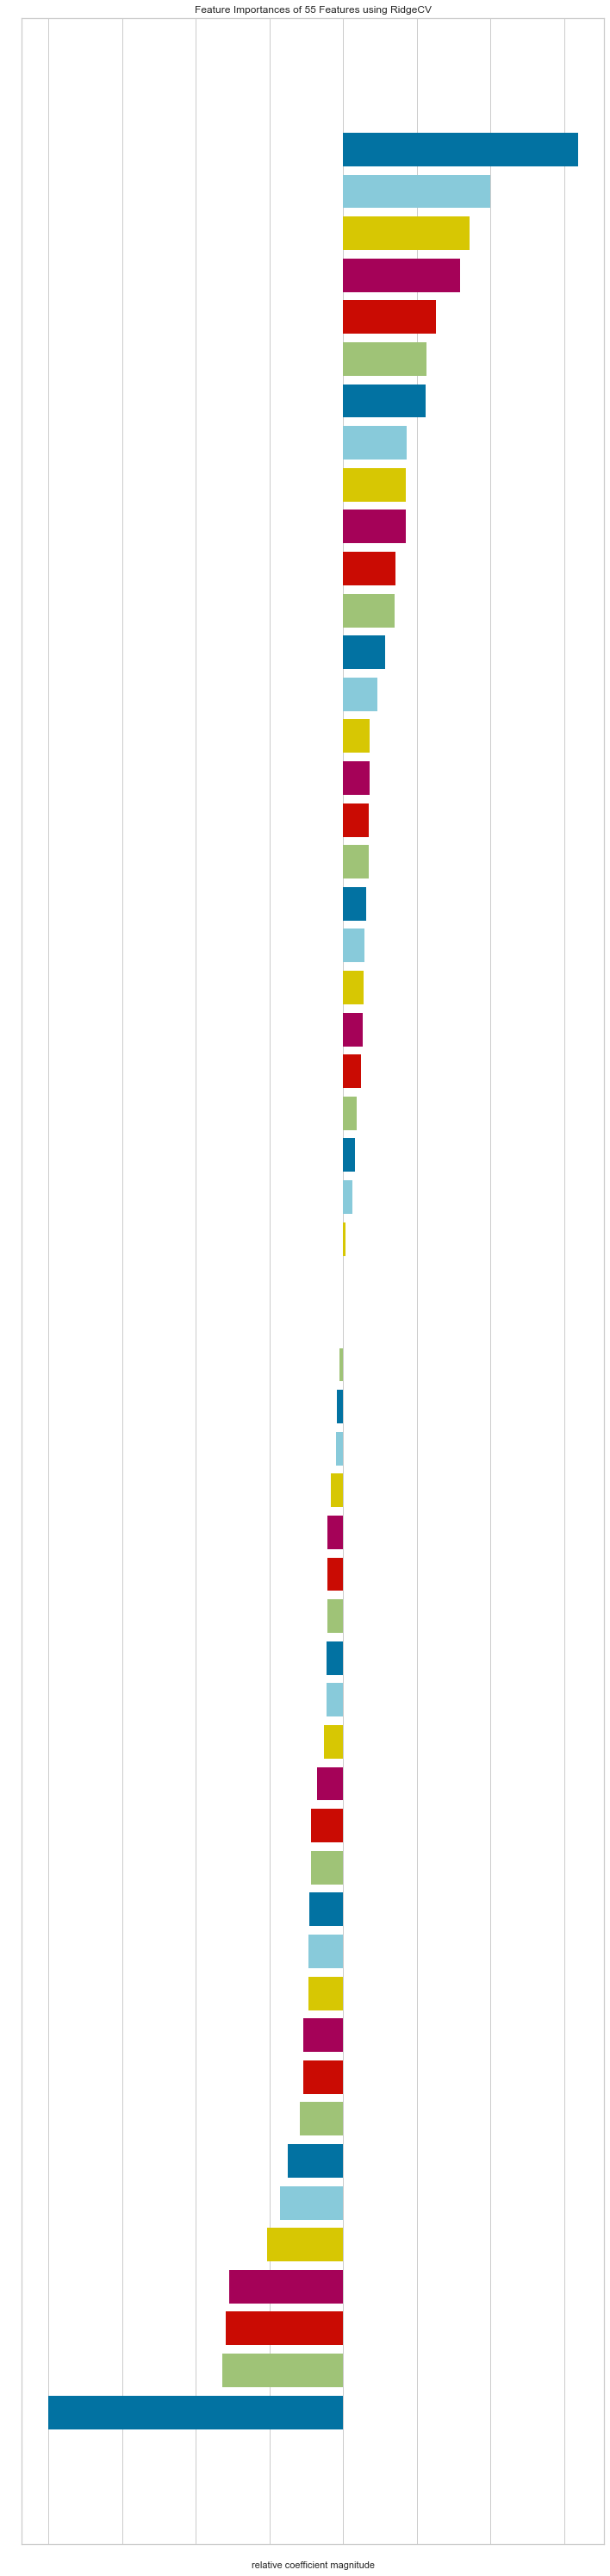

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [182]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()